In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/happiness_score_dataset.csv')

In [ ]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [ ]:
df.shape

(158, 12)

In [ ]:
df.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [ ]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [ ]:
df.nunique()

Country                          158
Region                            10
Happiness Rank                   157
Happiness Score                  157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [ ]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


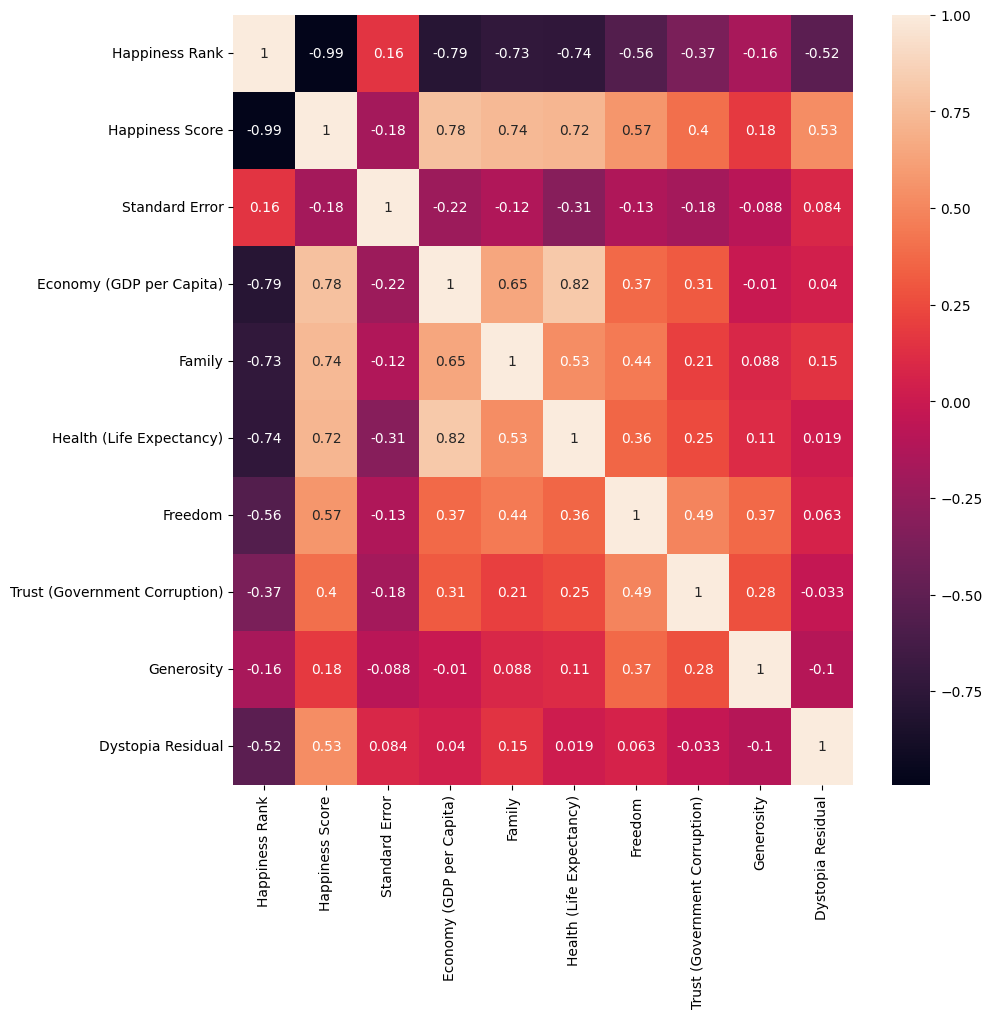

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

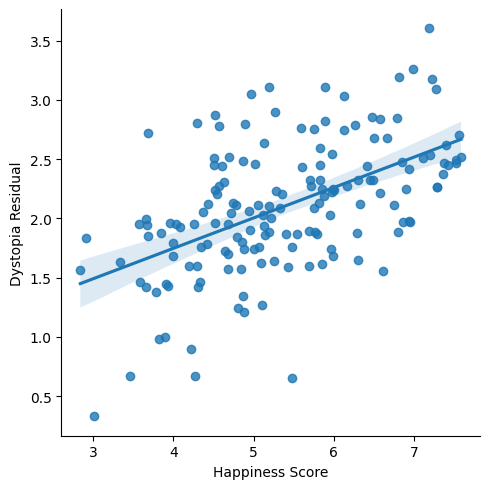

In [ ]:
sns.lmplot(x='Happiness Score',y='Dystopia Residual',data=df)

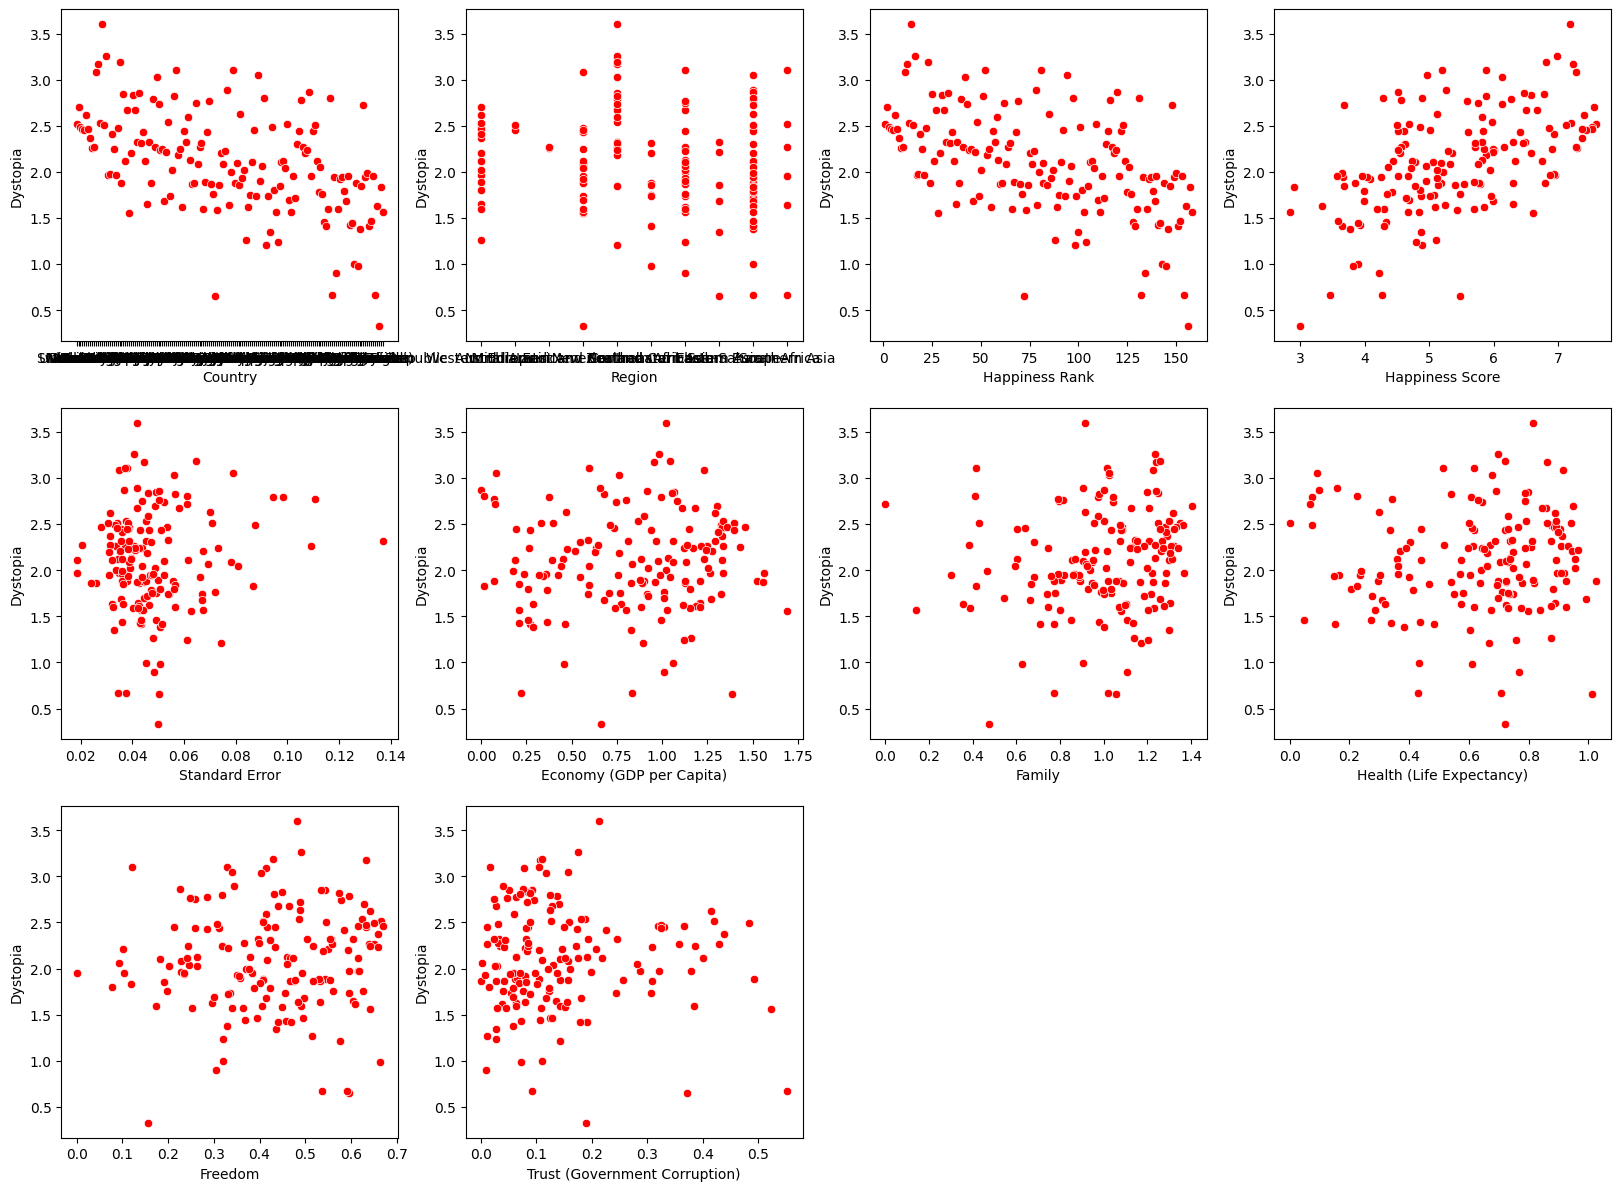

In [ ]:
plt.figure(figsize=(20,25))
p=1
for i in df:
  if p<=10:
    plt.subplot(5,4,p)
    sns.scatterplot(x=i,y='Dystopia Residual',data=df,color='r')
    plt.xlabel(i)
    plt.ylabel('Dystopia')
  p+=1
plt.show()

In [ ]:
df_new = df.drop(['Country','Region','Happiness Rank'],axis=1)

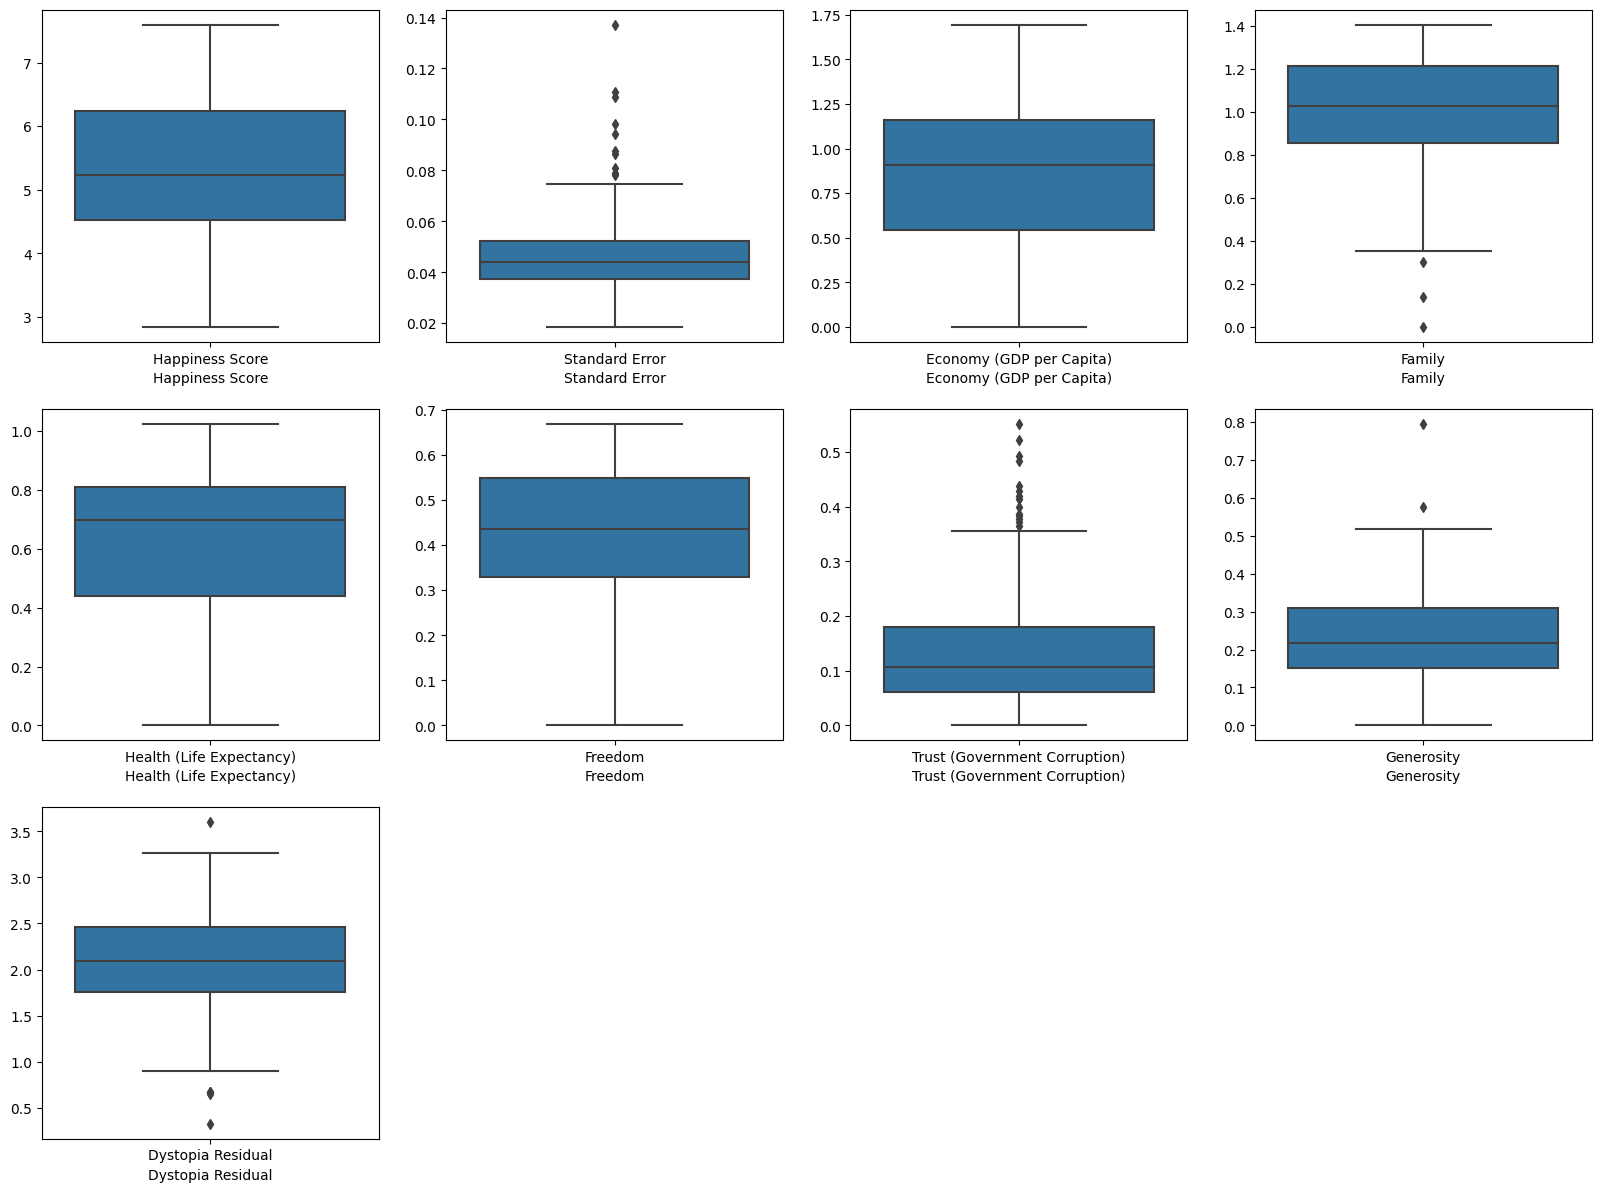

In [ ]:
plt.figure(figsize=(20,25))
p=1
for i in df_new:
  if p<=10:
    plt.subplot(5,4,p)
    sns.boxplot(df_new[i].to_frame())
    plt.xlabel(i)
  p+=1
plt.show()

In [ ]:
from scipy.stats import zscore
out_feature=df_new[['Trust (Government Corruption)','Family','Dystopia Residual']]
z=np.abs(zscore(out_feature))
z

,Trust (Government Corruption),Family,Dystopia Residual
0,2.309652,1.320281,0.758258
1,0.016480,1.514458,1.092857
2,2.842774,1.361054,0.712335
3,1.852081,1.251922,0.663893
4,1.555725,1.221204,0.639337
...,...,...,...
153,3.413922,0.800520,2.588925
154,0.529210,2.346860,0.843967
155,0.381419,1.901086,3.208430
156,0.357715,2.118467,0.481985


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Score                158 non-null    float64
 1   Standard Error                 158 non-null    float64
 2   Economy (GDP per Capita)       158 non-null    float64
 3   Family                         158 non-null    float64
 4   Health (Life Expectancy)       158 non-null    float64
 5   Freedom                        158 non-null    float64
 6   Trust (Government Corruption)  158 non-null    float64
 7   Generosity                     158 non-null    float64
 8   Dystopia Residual              158 non-null    float64
dtypes: float64(9)
memory usage: 11.2 KB


In [ ]:
#removing outliers and saving to new dataframe
df1=df[(z<3).all(axis=1)]
df1.shape

(153, 12)

In [ ]:
q1 = df1.quantile(0.25)
q3 = df1.quantile(0.75)
IQR = q3 - q1
df2 = df_new[~((df_new < (q1 - 1.5 * IQR)) | (df_new > (q3 + 1.5 * IQR))).any(axis=1)]
df2.shape

(122, 9)

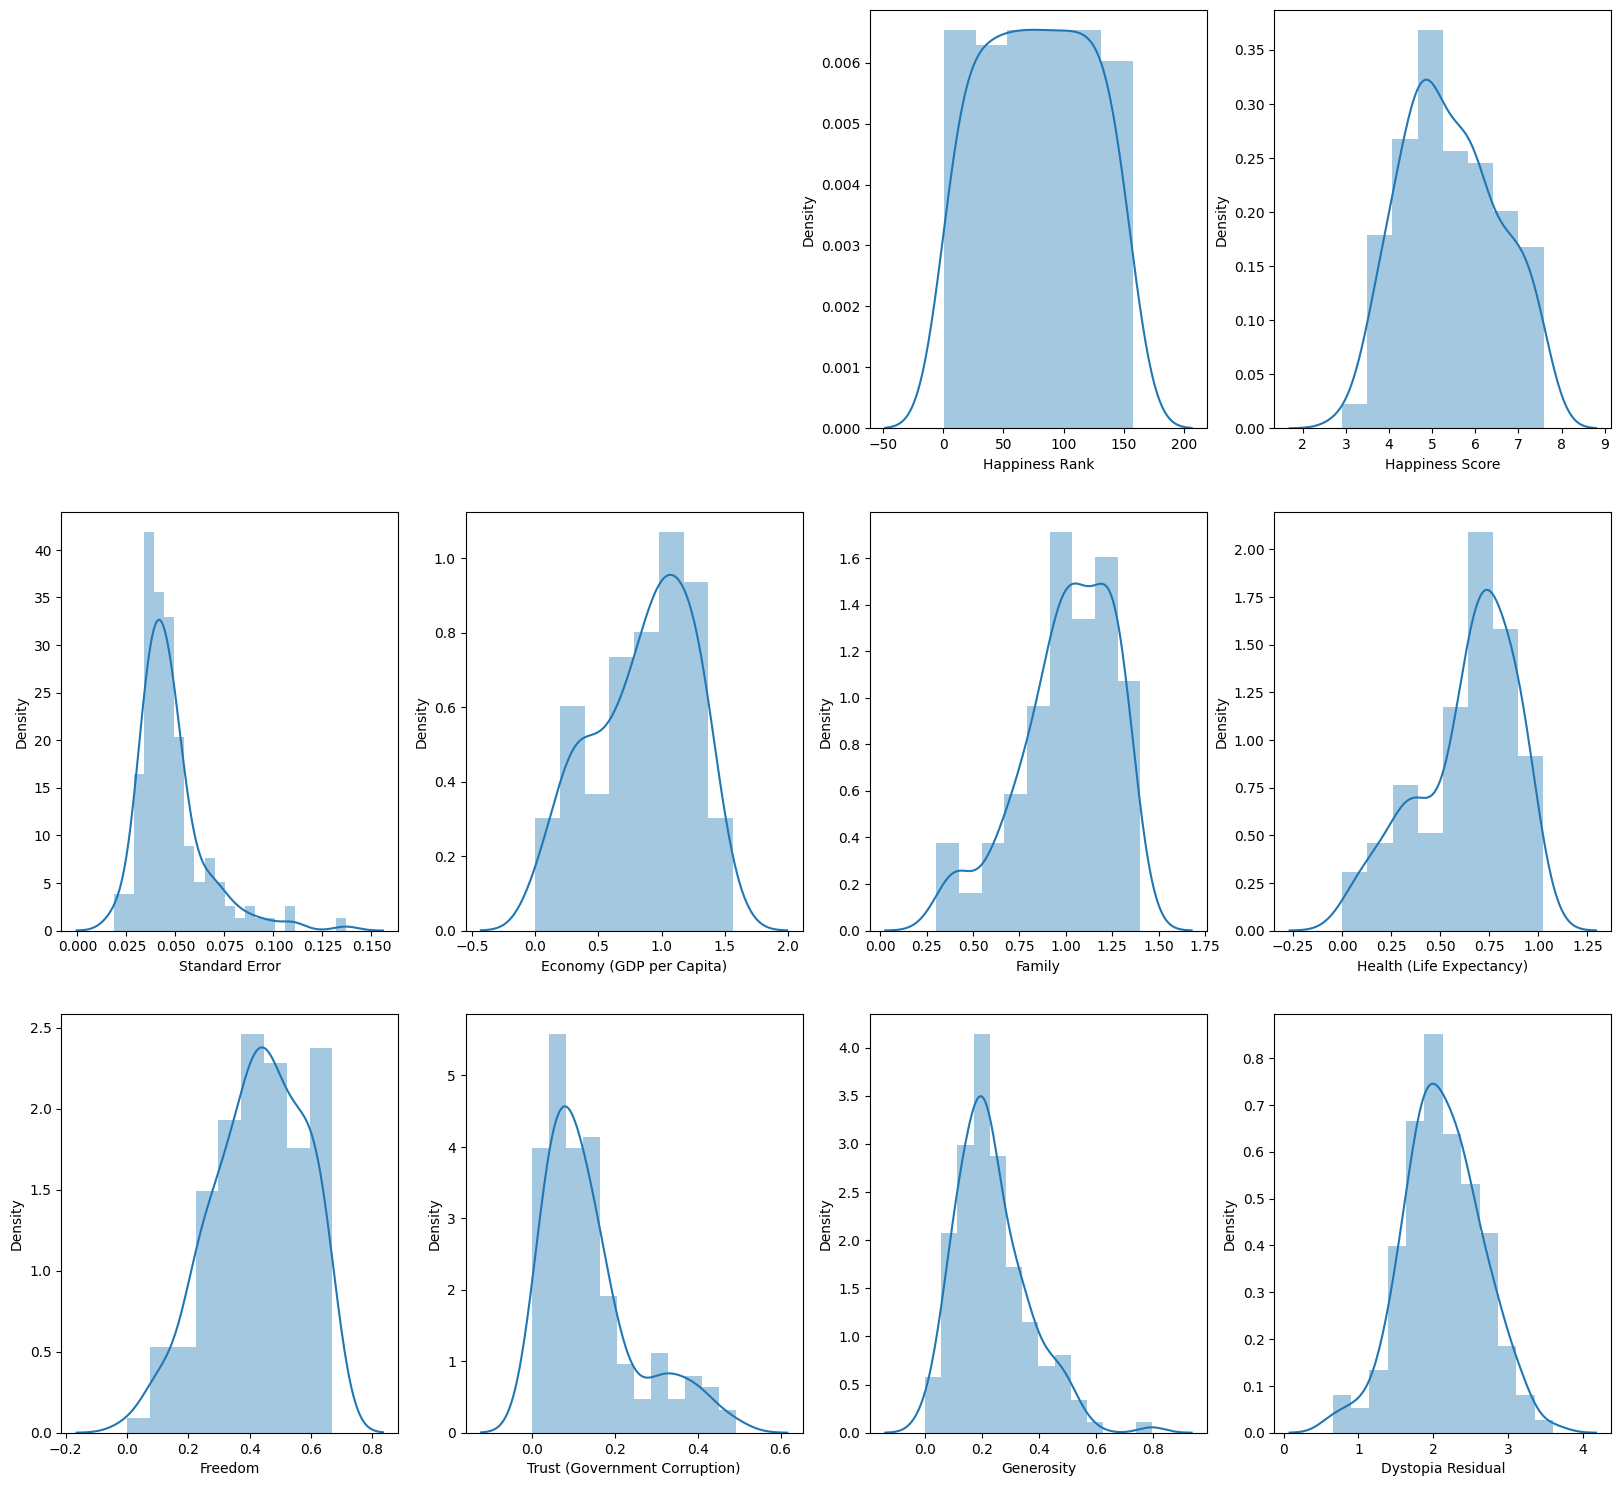

In [ ]:
plt.figure(figsize=(20,25))
p=1
for i in df1:
  if not df1[i].dtype == 'object':
    plt.subplot(4,4,p)
    sns.distplot(df1[i].to_frame())
    plt.xlabel(i)
  p+=1
plt.show()

In [ ]:
df1.skew()

Happiness Rank                  -0.004256
Happiness Score                  0.177630
Standard Error                   2.042931
Economy (GDP per Capita)        -0.386242
Family                          -0.794179
Health (Life Expectancy)        -0.722058
Freedom                         -0.409116
Trust (Government Corruption)    1.280224
Generosity                       1.022648
Dystopia Residual               -0.034512
dtype: float64

In [ ]:
df1['Standard Error']=np.cbrt(df1['Standard Error'])
df1['Trust (Government Corruption)']=np.cbrt(df1['Trust (Government Corruption)'])
df1['Health (Life Expectancy)']=np.cbrt(df1['Health (Life Expectancy)'])

In [ ]:
df1.skew()

Happiness Rank                  -0.004256
Happiness Score                  0.177630
Standard Error                   1.034126
Economy (GDP per Capita)        -0.386242
Family                          -0.794179
Health (Life Expectancy)        -2.060153
Freedom                         -0.409116
Trust (Government Corruption)   -0.055263
Generosity                       1.022648
Dystopia Residual               -0.034512
dtype: float64

In [ ]:
df1.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,77.882353,5.423314,0.358222,0.855077,1.007308,0.836796,0.427965,0.478546,0.235711,2.122830
std,44.674545,1.104353,0.038945,0.392109,0.251034,0.150952,0.149824,0.143034,0.126995,0.524907
min,1.000000,2.905000,0.264383,0.000000,0.302850,0.000000,0.000000,0.000000,0.000000,0.654290
25%,40.000000,4.571000,0.334001,0.590660,0.869080,0.775957,0.328180,0.391247,0.145740,1.792930
50%,78.000000,5.268000,0.352150,0.918610,1.035160,0.886642,0.434770,0.473009,0.214880,2.110320
75%,116.000000,6.269000,0.371834,1.159910,1.219630,0.933415,0.546040,0.559568,0.306380,2.465310
max,157.000000,7.587000,0.515426,1.563910,1.402230,1.008347,0.669730,0.789498,0.795880,3.602140


In [ ]:
df1.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [ ]:
x=df1.drop(['Happiness Score','Happiness Rank'],axis=1)
y=df1['Happiness Score']

In [ ]:
x.shape

(153, 10)

In [ ]:
y.shape

(153,)

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
x= pd.DataFrame(scalar.fit_transform(df1[['Standard Error','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']]))
x

,0,1,2,3,4,5,6,7
0,-0.873624,1.385357,1.367649,0.952341,1.591100,1.895344,0.482459,0.754125
1,0.188313,1.144354,1.578351,0.967091,1.344672,0.298040,1.584691,1.107019
2,-0.941946,1.203613,1.411892,0.794501,1.482685,2.148935,0.834885,0.705692
3,-0.507029,1.545249,1.293472,0.820003,1.618957,1.656296,0.879126,0.654601
4,-0.759260,1.205686,1.260140,0.868701,1.372797,1.488412,1.756994,0.628702
...,...,...,...,...,...,...,...,...
148,0.350669,-0.997215,-0.943832,-2.015788,0.272512,0.598035,-0.269085,-1.348654
149,-0.186298,-1.527426,-0.621186,-1.259286,-0.221213,0.181267,-0.144104,-1.257463
150,-1.149621,-1.369555,-2.815446,-1.095857,-1.297927,-0.131699,1.022199,-0.326326
151,-0.678200,-1.454427,-2.611579,-1.019868,0.378583,-0.333034,-0.419584,-0.935705


In [ ]:
x.columns = ['Standard Error','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']

In [ ]:
x

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,-0.873624,1.385357,1.367649,0.952341,1.591100,1.895344,0.482459,0.754125
1,0.188313,1.144354,1.578351,0.967091,1.344672,0.298040,1.584691,1.107019
2,-0.941946,1.203613,1.411892,0.794501,1.482685,2.148935,0.834885,0.705692
3,-0.507029,1.545249,1.293472,0.820003,1.618957,1.656296,0.879126,0.654601
4,-0.759260,1.205686,1.260140,0.868701,1.372797,1.488412,1.756994,0.628702
...,...,...,...,...,...,...,...,...
148,0.350669,-0.997215,-0.943832,-2.015788,0.272512,0.598035,-0.269085,-1.348654
149,-0.186298,-1.527426,-0.621186,-1.259286,-0.221213,0.181267,-0.144104,-1.257463
150,-1.149621,-1.369555,-2.815446,-1.095857,-1.297927,-0.131699,1.022199,-0.326326
151,-0.678200,-1.454427,-2.611579,-1.019868,0.378583,-0.333034,-0.419584,-0.935705


In [ ]:
x.shape

(153, 8)

In [ ]:
y.shape

(153,)

In [ ]:
x.describe()

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,1.530000e+02,1.530000e+02,1.530000e+02,1.530000e+02,1.530000e+02,1.530000e+02,1.530000e+02,1.530000e+02
mean,2.612289e-16,-1.857628e-16,7.430512e-16,9.288140e-17,4.644070e-17,-4.644070e-17,-3.134747e-16,-3.483053e-16
std,1.003284e+00,1.003284e+00,1.003284e+00,1.003284e+00,1.003284e+00,1.003284e+00,1.003284e+00,1.003284e+00
min,-2.417437e+00,-2.187874e+00,-2.815446e+00,-5.561666e+00,-2.865821e+00,-3.356669e+00,-1.862156e+00,-2.806904e+00
25%,-6.239754e-01,-6.765605e-01,-5.524438e-01,-4.043601e-01,-6.681975e-01,-6.123372e-01,-7.107840e-01,-6.305571e-01
50%,-1.564241e-01,1.625607e-01,1.113138e-01,3.312999e-01,4.557139e-02,-3.883397e-02,-1.645658e-01,-2.391157e-02
75%,3.506689e-01,7.799717e-01,8.485691e-01,6.421685e-01,7.906795e-01,5.683174e-01,5.583003e-01,6.546010e-01
max,4.049824e+00,1.813681e+00,1.578351e+00,1.140195e+00,1.618957e+00,2.181119e+00,4.425436e+00,2.827489e+00


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['Features'] = x.columns
vif

,VIF Factor,Features
0,1.148816,Standard Error
1,3.083912,Economy (GDP per Capita)
2,1.987107,Family
3,2.211132,Health (Life Expectancy)
4,1.870203,Freedom
5,1.341760,Trust (Government Corruption)
6,1.299523,Generosity
7,1.045161,Dystopia Residual


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
#finding best random state
maxAcc=0
maxRs=0

for i in range(1,200):
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=i)
  lr=LinearRegression()
  lr.fit(x_train,y_train)
  pred=lr.predict(x_test)
  acc=r2_score(y_test,pred)
  if acc>maxAcc:
    maxAcc=acc
    maxRs=i
print('Best Accuracy', maxAcc, 'random_state is', maxRs)

Best Accuracy 0.9984206572587061 random_state is 197


#Train Test Split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=197)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, Ridge

#LinearRegression

In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
print('R2 Score',r2_score(y_test,pred_lr))
print('MAE',mean_absolute_error(y_test,pred_lr))
print('MSE',mean_squared_error(y_test,pred_lr))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred_lr)))

R2 Score 0.9984206572587061
MAE 0.040129709894990574
MSE 0.002357468266373668
RMSE 0.048553766757829075


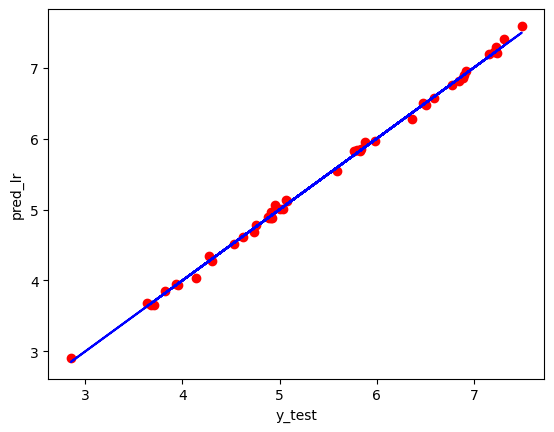

In [ ]:
plt.scatter(x=pred_lr,y=y_test,color='red')
plt.plot(pred_lr,pred_lr,color='blue')
plt.xlabel('y_test')
plt.ylabel('pred_lr')
plt.show()

#RandomForestRegressor

In [ ]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr=rfr.predict(x_test)
print('R2 Score',r2_score(y_test,pred_rfr))
print('MAE',mean_absolute_error(y_test,pred_rfr))
print('MSE',mean_squared_error(y_test,pred_rfr))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred_rfr)))

R2 Score 0.9013974551111731
MAE 0.2883489130434777
MSE 0.1471829796543475
RMSE 0.3836443400525381


In [ ]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr=rfr.predict(x_test)
print('R2 Score',r2_score(y_test,pred_rfr))
print('MAE',mean_absolute_error(y_test,pred_rfr))
print('MSE',mean_squared_error(y_test,pred_rfr))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred_rfr)))

R2 Score 0.9083285255075618
MAE 0.2670402173913044
MSE 0.13683704391521703
RMSE 0.3699149144265706


#KNeighborsRegressor

In [ ]:
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
print('R2 Score',r2_score(y_test,pred_knn))
print('MAE',mean_absolute_error(y_test,pred_knn))
print('MSE',mean_squared_error(y_test,pred_knn))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred_knn)))

R2 Score 0.8841294565507877
MAE 0.3189391304347826
MSE 0.1729587391304349
RMSE 0.41588308348673536


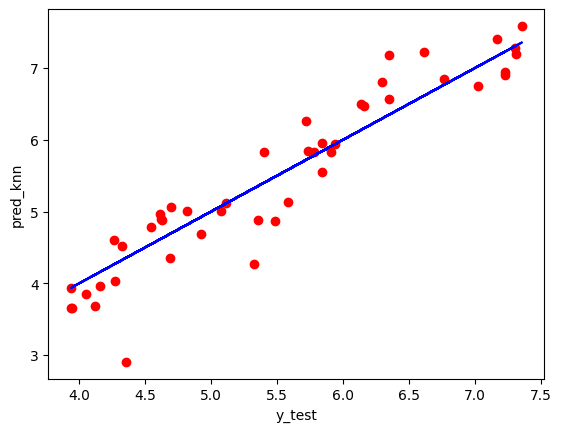

In [ ]:
plt.scatter(x=pred_knn,y=y_test,color='red')
plt.plot(pred_knn,pred_knn,color='blue')
plt.xlabel('y_test')
plt.ylabel('pred_knn')
plt.show()

#GradientBoostingRegressor

In [ ]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_gbr=gbr.predict(x_test)
print('R2 Score',r2_score(y_test,pred_gbr))
print('MAE',mean_absolute_error(y_test,pred_gbr))
print('MSE',mean_squared_error(y_test,pred_gbr))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred_gbr)))

R2 Score 0.9502877111010894
MAE 0.1932077067584292
MSE 0.07420500975739512
RMSE 0.27240596498130343


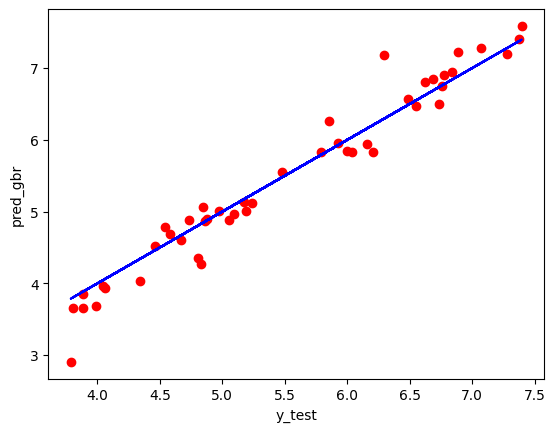

In [ ]:
plt.scatter(x=pred_gbr,y=y_test,color='red')
plt.plot(pred_gbr,pred_gbr,color='blue')
plt.xlabel('y_test')
plt.ylabel('pred_gbr')
plt.show()

#Lasso

In [ ]:
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
print('R2 Score',r2_score(y_test,pred_lasso))
print('MAE',mean_absolute_error(y_test,pred_lasso))
print('MSE',mean_squared_error(y_test,pred_lasso))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2 Score -0.0026376502896634513
MAE 1.0618673303535149
MSE 1.4966266545113107
RMSE 1.2233669337166633


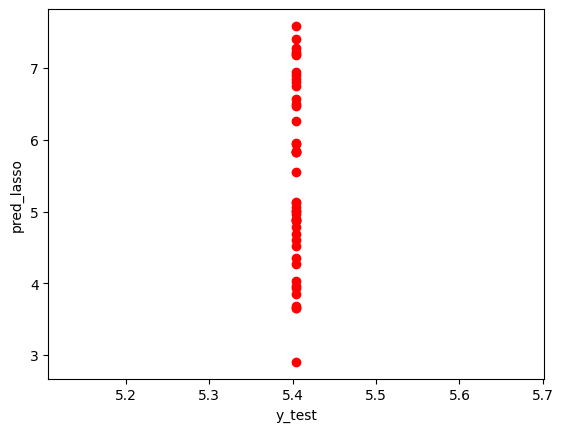

In [ ]:
plt.scatter(x=pred_lasso,y=y_test,color='red')
plt.plot(pred_lasso,pred_lasso,color='blue')
plt.xlabel('y_test')
plt.ylabel('pred_lasso')
plt.show()

#Ridge

In [ ]:
ridge=Ridge()
ridge.fit(x_train,y_train)
pred_ridge=ridge.predict(x_test)
print('R2 Score',r2_score(y_test,pred_ridge))
print('MAE',mean_absolute_error(y_test,pred_ridge))
print('MSE',mean_squared_error(y_test,pred_ridge))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred_ridge)))

R2 Score 0.9984066971112755
MAE 0.04049786887653396
MSE 0.002378306431327387
RMSE 0.04876788319506381


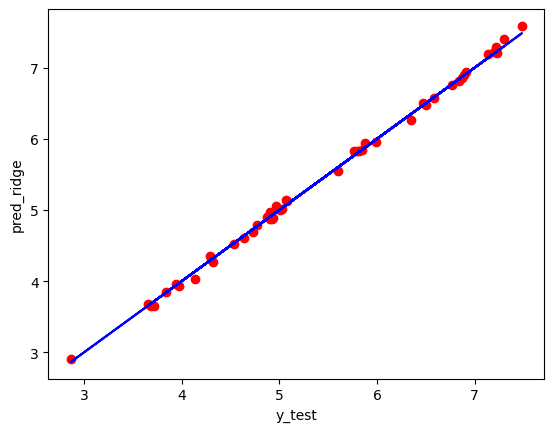

In [ ]:
plt.scatter(x=pred_ridge,y=y_test,color='red')
plt.plot(pred_ridge,pred_ridge,color='blue')
plt.xlabel('y_test')
plt.ylabel('pred_ridge')
plt.show()

#DecisionTreeRegressor

In [ ]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
print('R2 Score',r2_score(y_test,pred_dtr))
print('MAE',mean_absolute_error(y_test,pred_dtr))
print('MSE',mean_squared_error(y_test,pred_dtr))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2 Score 0.8686660637486034
MAE 0.32891304347826084
MSE 0.19604078260869567
RMSE 0.44276492928945455


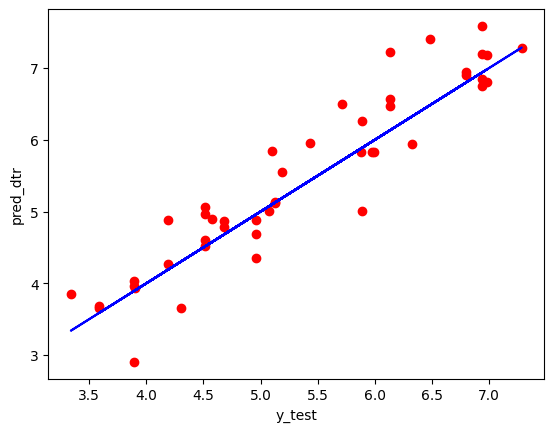

In [ ]:
plt.scatter(x=pred_dtr,y=y_test,color='red')
plt.plot(pred_dtr,pred_dtr,color='blue')
plt.xlabel('y_test')
plt.ylabel('pred_dtr')
plt.show()

#SVR

In [ ]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
print('R2 Score',r2_score(y_test,pred_svr))
print('MAE',mean_absolute_error(y_test,pred_svr))
print('MSE',mean_squared_error(y_test,pred_svr))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred_svr)))

R2 Score 0.9301498936256964
MAE 0.20070935391876202
MSE 0.10426451768495969
RMSE 0.3229001667465653


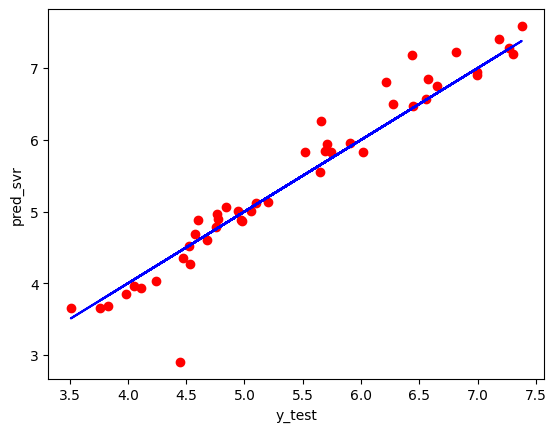

In [ ]:
plt.scatter(x=pred_svr,y=y_test,color='red')
plt.plot(pred_svr,pred_svr,color='blue')
plt.xlabel('y_test')
plt.ylabel('pred_svr')
plt.show()

#ExtraTreesRegressor

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
print('R2 Score',r2_score(y_test,pred_etr))
print('MAE',mean_absolute_error(y_test,pred_etr))
print('MSE',mean_squared_error(y_test,pred_etr))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred_etr)))

R2 Score 0.9207923248041702
MAE 0.25210565217391295
MSE 0.1182324620521737
RMSE 0.3438494758643289


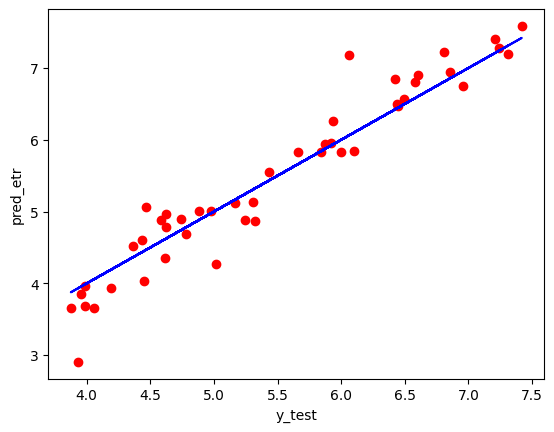

In [ ]:
plt.scatter(x=pred_etr,y=y_test,color='red')
plt.plot(pred_etr,pred_etr,color='blue')
plt.xlabel('y_test')
plt.ylabel('pred_etr')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
#score for Linear Regression
score=cross_val_score(lr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Difference between R2 score and cross valication score is', (r2_score(y_test,pred_lr)) - score.mean())

[0.91231143 0.91481031 0.89808903 0.09196581 0.9472803 ]
0.7528913760740963
Difference between R2 score and cross valication score is 0.24552928118460982


In [ ]:
#score for RandomForest Regression
score=cross_val_score(rfr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Difference between R2 score and cross valication score is', (r2_score(y_test,pred_rfr)) - score.mean())

[-7.47695551 -1.08457893 -0.23729627 -2.09102078 -6.16402261]
-3.4107748188981875
Difference between R2 score and cross valication score is 4.319103344405749


In [ ]:
#score for KNN
score=cross_val_score(knn,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Difference between R2 score and cross valication score is', (r2_score(y_test,pred_knn)) - score.mean())

[-10.30836418  -3.3457872   -1.51354778  -6.14696308  -5.70114699]
-5.403161847885153
Difference between R2 score and cross valication score is 6.287291304435941


In [ ]:
#score for GradientBoostingRegression
score=cross_val_score(gbr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Difference between R2 score and cross valication score is', (r2_score(y_test,pred_gbr)) - score.mean())

[-3.71811164 -0.64796384 -0.27757761 -3.01960553 -4.12783012]
-2.3582177450473205
Difference between R2 score and cross valication score is 3.30850545614841


In [ ]:
#score for Lasso
score=cross_val_score(lasso,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Difference between R2 score and cross valication score is', (r2_score(y_test,pred_lasso)) - score.mean())

[-38.88788761 -11.72583604  -0.31899802 -35.25144851 -28.3213373 ]
-22.901101496407527
Difference between R2 score and cross valication score is 22.898463846117863


In [ ]:
#score for Ridge
score=cross_val_score(ridge,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Difference between R2 score and cross valication score is', (r2_score(y_test,pred_ridge)) - score.mean())

[0.87929921 0.92222921 0.9025925  0.06488165 0.936329  ]
0.7410663160778072
Difference between R2 score and cross valication score is 0.25734038103346835


In [ ]:
#score for DecisionTreeRegressor
score=cross_val_score(dtr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Difference between R2 score and cross valication score is', (r2_score(y_test,pred_dtr)) - score.mean())

[ -5.36594058  -8.50535692  -5.55489153 -12.96233251  -5.46265969]
-7.57023624563414
Difference between R2 score and cross valication score is 8.438902309382744


In [ ]:
#score for SVR
score=cross_val_score(svr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Difference between R2 score and cross valication score is', (r2_score(y_test,pred_svr)) - score.mean())

[-7.8514286   0.04979772  0.80752789 -0.81905947 -5.04117527]
-2.570867544770316
Difference between R2 score and cross valication score is 3.501017438396013


In [ ]:
#score for ExtratreeRegressor
score=cross_val_score(etr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Difference between R2 score and cross valication score is', (r2_score(y_test,pred_etr)) - score.mean())

[-6.77607113 -0.33574108 -0.10177974 -0.92793348 -5.78696391]
-2.7856978670954735
Difference between R2 score and cross valication score is 3.706490191899644


Linear Regression is the best performing model

#Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
# Hyperparameter tuning
parameters = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}
grid_search = GridSearchCV(LinearRegression(), parameters, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False]})

In [ ]:
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'copy_X': True, 'fit_intercept': True}
Best score: 0.9888684082780484


In [ ]:
model=LinearRegression(copy_X= True, fit_intercept=True)

In [ ]:
model.fit(x_train,y_train)
pred=model.predict(x_test)
print('R2 Score',r2_score(y_test,pred))
print('MAE',mean_absolute_error(y_test,pred))
print('MSE',mean_squared_error(y_test,pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))

R2 Score 0.9984206572587061
MAE 0.040129709894990574
MSE 0.002357468266373668
RMSE 0.048553766757829075


In [ ]:
result=model.score(x_test,y_test)
result

0.9984206572587061

In [ ]:
conclusion=pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=['Predicted','Orginal'])

In [ ]:
conclusion.T

,Predicted,Orginal
0,3.950485,3.931
1,4.535185,4.518
2,3.704849,3.655
3,7.491954,7.587
4,3.639151,3.681
5,6.771950,6.750
6,2.852364,2.905
7,5.080424,5.123
8,7.205305,7.226
9,7.239963,7.200
